In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import pandas as pd

In [27]:
df = pd.read_csv('dataset.csv', parse_dates=[3])

In [28]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [29]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [30]:
df.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,10,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,10,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,10,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,10,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,10,9


In [31]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

In [32]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


In [33]:
sns.set_style('dark')

In [34]:
months = [datetime.datetime(2016, 10, 1),
         datetime.datetime(2016, 11, 1),
         datetime.datetime(2016, 12, 1)]
plt.rc('date.autoformatter', day='%b %Y')

([<matplotlib.axis.XTick at 0x23e0bc0c850>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

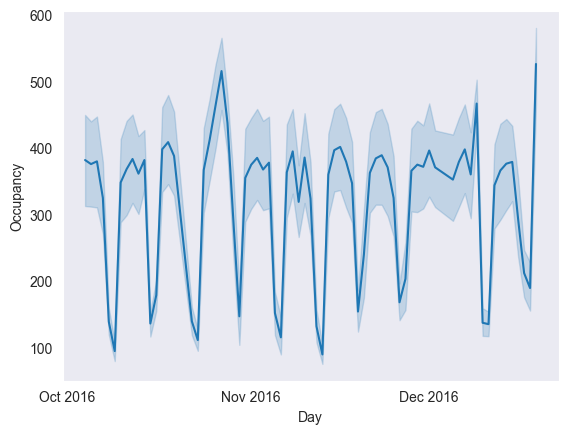

In [35]:
sns.lineplot(x=park.Day, y=park.Occupancy)
plt.xticks(months)

<Axes: xlabel='Hour', ylabel='Occupancy'>

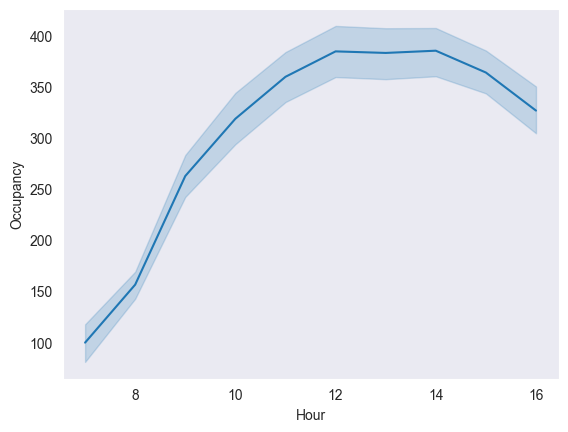

In [36]:
sns.lineplot(x=park.Hour, y=park.Occupancy) #shows the changes of occupancy in relation to hour

<Axes: xlabel='Hour', ylabel='Occupancy'>

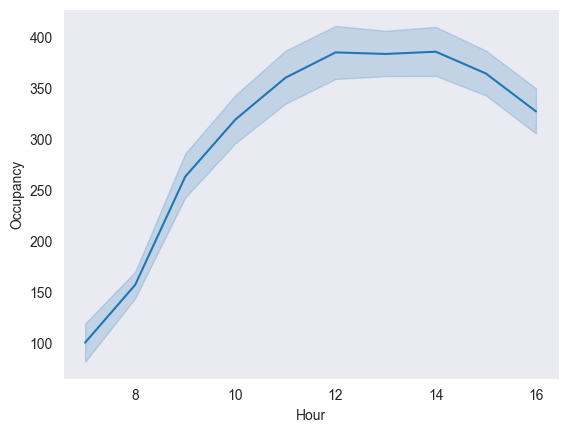

In [37]:
sns.lineplot(x='Hour', y='Occupancy', data=park)

<Axes: xlabel='Hour', ylabel='Occupancy'>

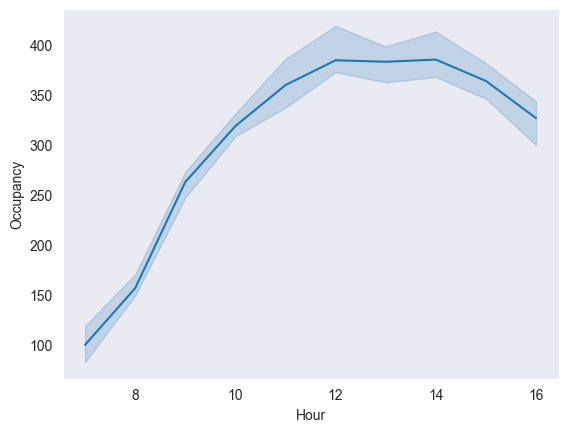

In [38]:
#bootrstraping- shadow of the line includes mean and confidence intervals 

sns.lineplot(x='Hour', y='Occupancy', data=park,
            n_boot=10
            ) #n_boot allows to manually adjust bootstrap samples, in case of 10 the shadow changes everytime we refresh the code

<Axes: xlabel='Hour', ylabel='Occupancy'>

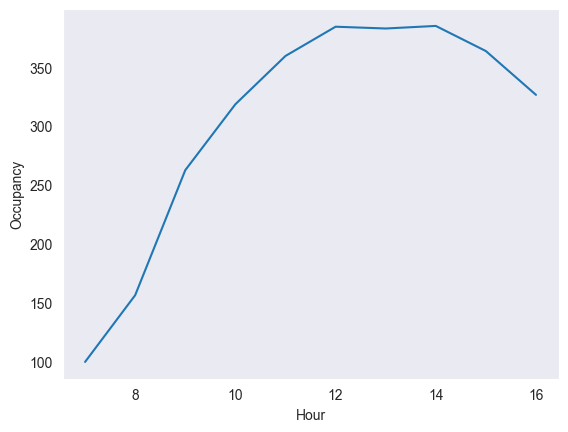

In [39]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
            errorbar=None
            ) #errorbar set to None allows to switch off the shadow responsible for confidence intervals 

<Axes: xlabel='Hour', ylabel='Occupancy'>

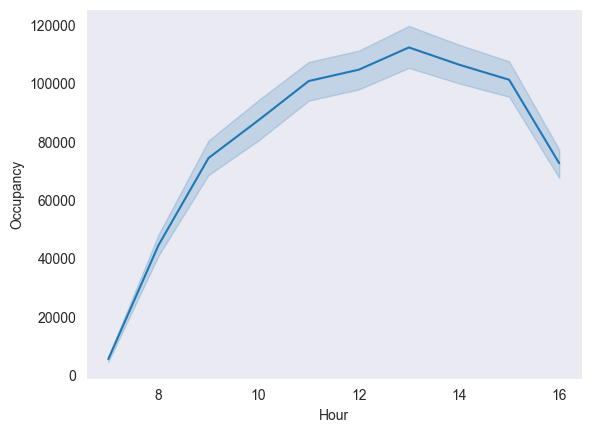

In [40]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
            estimator='sum'
            ) #estimator changed to sum or std, be default is mean

([<matplotlib.axis.XTick at 0x23e0c3a7450>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

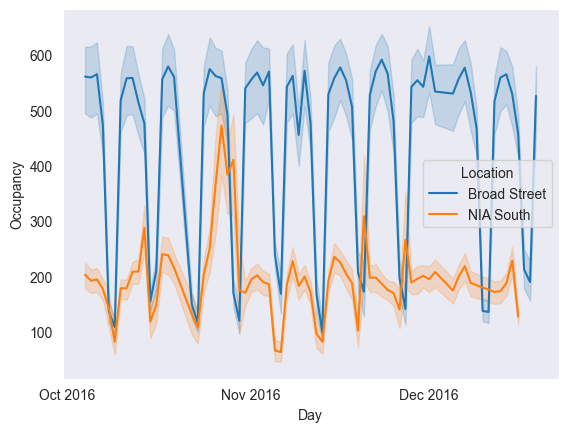

In [43]:
sns.lineplot(x=park.Day, y=park.Occupancy, hue=park.Location)
plt.xticks(months)

([<matplotlib.axis.XTick at 0x23e0c43c310>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

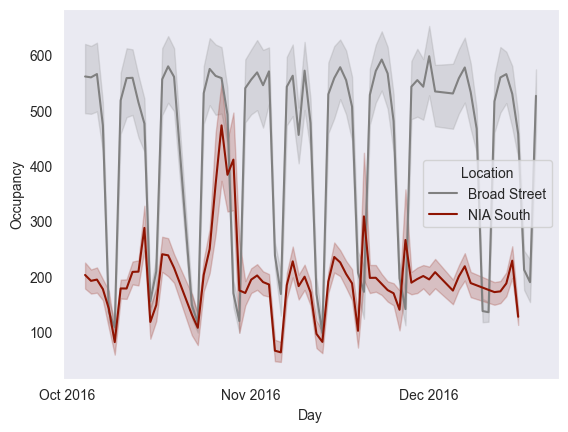

In [44]:
sns.lineplot(x=park.Day, y=park.Occupancy, hue=park.Location,
            palette= ['gray', 'xkcd:brick red']) #changing palette

plt.xticks(months)

([<matplotlib.axis.XTick at 0x23e0c4b54d0>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

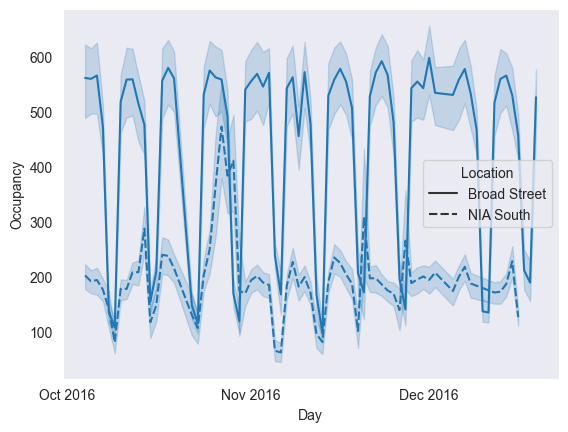

In [45]:
sns.lineplot(x=park.Day, y=park.Occupancy, style=park.Location) #setting different styles for every location 
plt.xticks(months)

([<matplotlib.axis.XTick at 0x23e0c441910>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

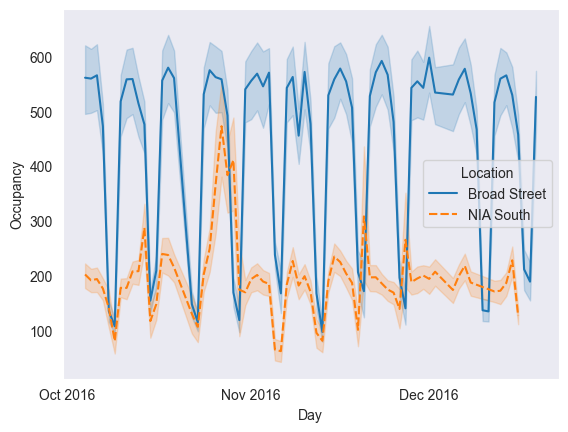

In [46]:
sns.lineplot(x=park.Day, y=park.Occupancy, 
             hue=park.Location,
             style=park.Location) #adjusting both style and hue

plt.xticks(months)

<Axes: xlabel='Hour', ylabel='Occupancy'>

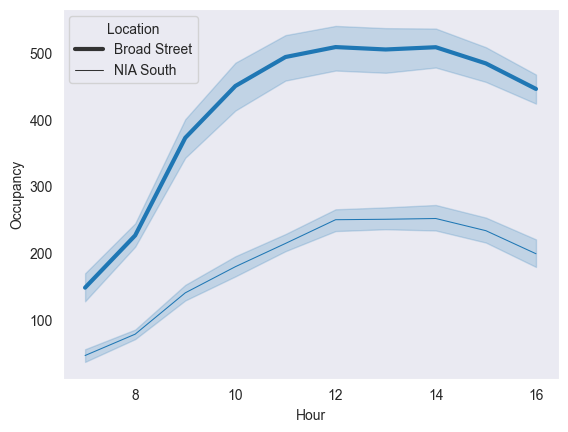

In [47]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
            size='Location' #different width sizes for different addresses
            )

<Axes: xlabel='Hour', ylabel='Occupancy'>

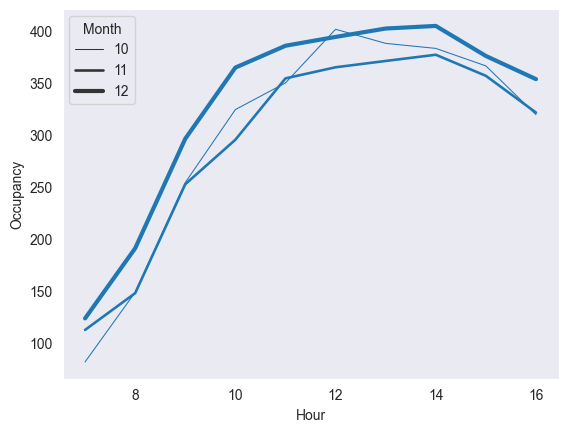

In [52]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             errorbar=None,
            size='Month') #different line widths for different months 

([<matplotlib.axis.XTick at 0x23e0c544ad0>,
 [Text(17075.0, 0, 'Oct 2016'),
  Text(17106.0, 0, 'Nov 2016'),
  Text(17136.0, 0, 'Dec 2016')])

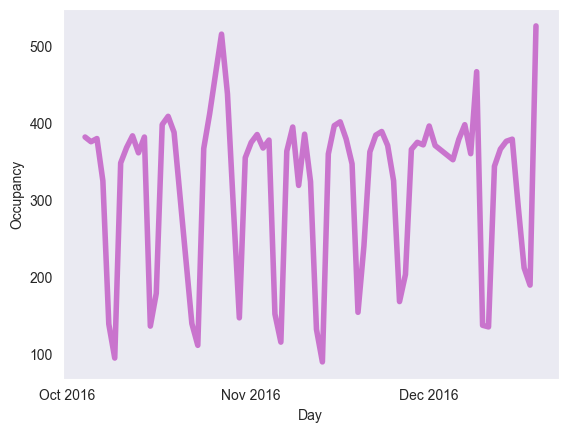

In [54]:
sns.lineplot(x=park.Day, y=park.Occupancy, errorbar=None,
            lw=4,
            color='#aa00aa',
            alpha=0.5) #matplotlib properties

plt.xticks(months)